In [35]:
# Imports
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web


In [36]:
# Choosing style for our graphs
style.use('ggplot')

# Declaring start and end times for our data
start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

# API Key for Alpha Vantage
api = 'LG3IP39DWD6BNS5N'

# Creating dataframe for Microsoft stock 
df = web.DataReader("MSFT", 'av-daily-adjusted', start, end, api_key=api)

print(df.head())

             open     high    low   close  adjusted close    volume  \
2015-01-02  46.66  47.4200  46.54  46.760         41.8672  27913852   
2015-01-05  46.37  46.7300  46.25  46.325         41.4778  39673865   
2015-01-06  46.38  46.7490  45.54  45.650         40.8734  36447854   
2015-01-07  45.98  46.4600  45.49  46.230         41.3927  29114061   
2015-01-08  46.75  47.7499  46.72  47.590         42.6104  29645202   

            dividend amount  split coefficient  
2015-01-02              0.0                1.0  
2015-01-05              0.0                1.0  
2015-01-06              0.0                1.0  
2015-01-07              0.0                1.0  
2015-01-08              0.0                1.0  


In [37]:
# Sorting dataframe as most recent date
df.sort_index(axis=0, ascending=False, inplace=True)

# Labeling the index column
df.index.name = "date"

print(df.head())

              open    high     low   close  adjusted close    volume  \
date                                                                   
2020-04-01  153.00  157.75  150.82  152.11          152.11  57560617   
2020-03-31  159.40  164.78  156.56  157.71          157.71  77927186   
2020-03-30  152.44  160.60  150.01  160.23          160.23  63420326   
2020-03-27  151.75  154.89  149.20  149.70          149.70  57042291   
2020-03-26  148.40  156.66  148.37  156.11          156.11  64694427   

            dividend amount  split coefficient  
date                                            
2020-04-01              0.0                1.0  
2020-03-31              0.0                1.0  
2020-03-30              0.0                1.0  
2020-03-27              0.0                1.0  
2020-03-26              0.0                1.0  


In [38]:
df.to_csv("MSFT.csv")

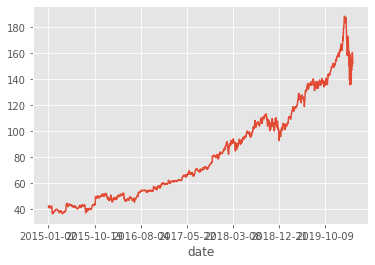

In [39]:
df.sort_index(axis=0, ascending=True, inplace=True)
df['adjusted close'].plot()
plt.show()

In [40]:
df['100 ma'] = df['adjusted close'].rolling(window=100, min_periods=0).mean()
print(df.head())


             open     high    low   close  adjusted close    volume  \
date                                                                  
2015-01-02  46.66  47.4200  46.54  46.760         41.8672  27913852   
2015-01-05  46.37  46.7300  46.25  46.325         41.4778  39673865   
2015-01-06  46.38  46.7490  45.54  45.650         40.8734  36447854   
2015-01-07  45.98  46.4600  45.49  46.230         41.3927  29114061   
2015-01-08  46.75  47.7499  46.72  47.590         42.6104  29645202   

            dividend amount  split coefficient     100 ma  
date                                                       
2015-01-02              0.0                1.0  41.867200  
2015-01-05              0.0                1.0  41.672500  
2015-01-06              0.0                1.0  41.406133  
2015-01-07              0.0                1.0  41.402775  
2015-01-08              0.0                1.0  41.644300  


In [41]:
df.columns
df.drop(['dividend amount', 'split coefficient'], axis=1)

,open,high,low,close,adjusted close,volume,100 ma
date,,,,,,,
2015-01-02,46.66,47.4200,46.54,46.760,41.8672,27913852,41.867200
2015-01-05,46.37,46.7300,46.25,46.325,41.4778,39673865,41.672500
2015-01-06,46.38,46.7490,45.54,45.650,40.8734,36447854,41.406133
2015-01-07,45.98,46.4600,45.49,46.230,41.3927,29114061,41.402775
2015-01-08,46.75,47.7499,46.72,47.590,42.6104,29645202,41.644300
...,...,...,...,...,...,...,...
2020-03-26,148.40,156.6600,148.37,156.110,156.1100,64694427,158.897561
2020-03-27,151.75,154.8900,149.20,149.700,149.7000,57042291,158.966133
2020-03-30,152.44,160.6000,150.01,160.230,160.2300,63420326,159.131756


In [42]:
# Plotting the stock price and the 100 ma with the volume below
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=3, colspan=1, sharex=ax1)

ax1.plot(df.index, df['adjusted close'])
ax1.plot(df.index, df['100 ma'])
ax2.bar(df.index, df['volume'])
plt.show()

"\nax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)\nax2 = plt.subplot2grid((6,1), (5,0), rowspan=3, colspan=1, sharex=ax1)\n\nax1.plot(df.index, df['adjusted close'])\nax1.plot(df.index, df['100 ma'])\nax2.bar(df.index, df['volume'])\nplt.show()\n"

# Attempting to use mplfinance for data visualization

In [43]:
import mplfinance as mpf
import matplotlib.dates as mdates

In [80]:
# Reading in the CSV
daily = pd.read_csv('MSFT.csv',index_col=0,parse_dates=True)

# Setting the index and dropping unnecessary columns
daily.index.name = 'Date'
daily.drop(['dividend amount', 'split coefficient'], axis=1, inplace=True)

# Renaming column names
daily.rename(columns={'open':'Open'}, inplace=True)
daily.rename(columns={'high':'High'}, inplace=True)
daily.rename(columns={'low':'Low'}, inplace=True)
daily.rename(columns={'close':'Close'}, inplace=True)
daily.rename(columns={'adjusted close':'Adjusted Close'}, inplace=True)
daily.rename(columns={'volume':'Volume'}, inplace=True)

daily.sort_index(axis=0, ascending=True, inplace=True)

daily.head()

,Open,High,Low,Close,Adjusted Close,Volume
Date,,,,,,
2015-01-02,46.66,47.4200,46.54,46.760,41.8672,27913852
2015-01-05,46.37,46.7300,46.25,46.325,41.4778,39673865
2015-01-06,46.38,46.7490,45.54,45.650,40.8734,36447854
2015-01-07,45.98,46.4600,45.49,46.230,41.3927,29114061
2015-01-08,46.75,47.7499,46.72,47.590,42.6104,29645202


In [81]:
daily.shape

(1321, 6)

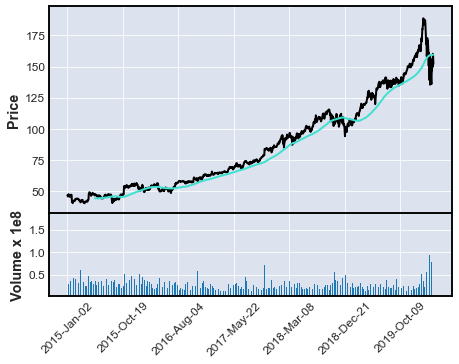

In [77]:
# Plotting daily stock prices and 100 ma from Jan 2015 to today
mpf.plot(daily, type='line', mav=100, volume=True)

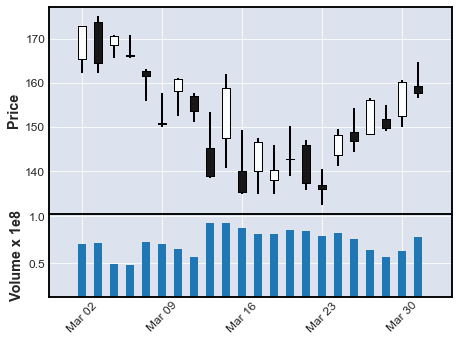

In [83]:
# Plotting candlestick graph for the month of March
march = daily.loc['2020-03-01':'2020-03-31',:]
mpf.plot(march, type='candle', volume=True)

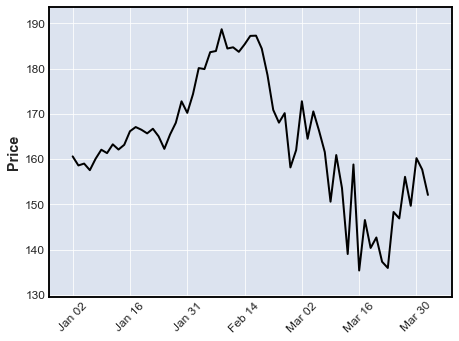

In [84]:
# Plotting graph for YTD
ytd = daily.loc['2020-01-02':]
mpf.plot(ytd, type='line')